In [5]:
import pandas as pd

file_path = './Vehicle_Sales_Data.xlsx'
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)
df = pd.read_excel(xls, 'siaaa')
df.head()


['siaaa']


,Vehicle Full Code,Vehicle Code,OEM Model Name,SIAM Company Code,SIAM Segment 1,SIAM Segment 2,SIAM Fuel,Month,Year,Production Qty,Domestic Sale,Export Sale,Category,Category Name,YrMth
0,HMPVF2U4DI,PV,PAJRO SFX,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
1,HMORF2U4DI,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,DIESEL,NOV,2012,0,0,0,PVUV,Utility vehicles PV,01-11-2012
2,SKOAP3EEDI,OA,Octavia,SKODAAUTO INDIA PVT LTD,Premium Car 3,Executive,DIESEL,NOV,2012,0,0,0,PVPC,Passenger car PV,01-11-2012
3,HMORF2U4PT,OR,OUTLANDER,HINDUSTAN MOTORS LTD,SUV,UV4:,PETROL,NOV,2012,0,6,0,PVUV,Utility vehicles PV,01-11-2012
4,FMTXF1U3PT,TX,Trax,FORCE MOTORS LTD,MPV,UV3,PETROL,MAY,2012,0,0,0,PVUV,Utility vehicles PV,01-05-2012


In [6]:
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")
print(df.info())

Number of rows: 19666, Number of columns: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19666 entries, 0 to 19665
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Vehicle Full Code  19666 non-null  object
 1   Vehicle Code       19666 non-null  object
 2   OEM Model Name     19666 non-null  object
 3   SIAM Company Code  19666 non-null  object
 4   SIAM Segment 1     19654 non-null  object
 5   SIAM Segment 2     19666 non-null  object
 6   SIAM Fuel          19648 non-null  object
 7   Month              19666 non-null  object
 8   Year               19666 non-null  int64 
 9   Production Qty     19666 non-null  int64 
 10  Domestic Sale      19666 non-null  int64 
 11  Export Sale        19666 non-null  int64 
 12  Category           18569 non-null  object
 13  Category Name      18569 non-null  object
 14  YrMth              19666 non-null  object
dtypes: int64(4), object(11)
memory usage: 2.3+

In [7]:
print(df.describe())
print(df.describe(include=['object']))


               Year  Production Qty  Domestic Sale   Export Sale
count  19666.000000     19666.00000   19666.000000  19666.000000
mean    2015.257399      1262.62992    1126.482203    238.537628
std        2.290398      2957.78831    2667.334476    963.164029
min     2012.000000       -28.00000    -128.000000      0.000000
25%     2013.000000         0.00000       0.000000      0.000000
50%     2015.000000        35.00000      77.000000      0.000000
75%     2017.000000       950.75000     865.750000      1.000000
max     2019.000000     33128.00000   30499.000000  15088.000000
       Vehicle Full Code Vehicle Code OEM Model Name        SIAM Company Code  \
count              19666        19666          19666                    19666   
unique               452          197            206                       23   
top           TKCAODEEDI           IC      Indigo CS  MARUTI SUZUKI INDIA LTD   
freq                  93          272            260                     2662   

       SI

In [8]:
# Check for missing values in each column
missing_data = df.isnull().sum()
print(missing_data)

# Percentage of missing values in each column
missing_percentage = (missing_data / df.shape[0]) * 100
print(missing_percentage)


Vehicle Full Code       0
Vehicle Code            0
OEM Model Name          0
SIAM Company Code       0
SIAM Segment 1         12
SIAM Segment 2          0
SIAM Fuel              18
Month                   0
Year                    0
Production Qty          0
Domestic Sale           0
Export Sale             0
Category             1097
Category Name        1097
YrMth                   0
dtype: int64
Vehicle Full Code    0.000000
Vehicle Code         0.000000
OEM Model Name       0.000000
SIAM Company Code    0.000000
SIAM Segment 1       0.061019
SIAM Segment 2       0.000000
SIAM Fuel            0.091529
Month                0.000000
Year                 0.000000
Production Qty       0.000000
Domestic Sale        0.000000
Export Sale          0.000000
Category             5.578155
Category Name        5.578155
YrMth                0.000000
dtype: float64


In [11]:
# Check for duplicate rows
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [10]:
# Forward fill for categorical columns based on the previous valid observation
df['SIAM Segment 1'].fillna(method='ffill', inplace=True)
df['SIAM Fuel'].fillna(method='ffill', inplace=True)
df['Category'].fillna(method='ffill', inplace=True)
df['Category Name'].fillna(method='ffill', inplace=True)

print(df[['SIAM Segment 1', 'SIAM Fuel', 'Category', 'Category Name']].isnull().sum())


SIAM Segment 1    0
SIAM Fuel         0
Category          0
Category Name     0
dtype: int64


C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3557826471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SIAM Segment 1'].fillna(method='ffill', inplace=True)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3557826471.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SIAM Segment 1'].fillna(method='ffill', inplace=True)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3557826471.py:3: FutureWarning: A va

In [15]:
# Check for rows with negative values in 'Production Qty' and 'Domestic Sale'
negative_production = df[df['Production Qty'] < 0]
negative_sales = df[df['Domestic Sale'] < 0]

print(f"Negative values in Production Qty:\n{negative_production[['Vehicle Full Code', 'Production Qty']]}")
print(f"Negative values in Domestic Sale:\n{negative_sales[['Vehicle Full Code', 'Domestic Sale']]}")


Negative values in Production Qty:
      Vehicle Full Code  Production Qty
11287        MMMMF1V1DI              -1
14494        MMMOF1V2DI              -1
17402        TMVEF1V1DI             -17
17736        MMJBF1V2DI              -1
18152        MMJBF1V2DI             -28
Negative values in Domestic Sale:
      Vehicle Full Code  Domestic Sale
2895         GMSUBBCTDI            -24
2949         GMSLOCMSDI            -30
4336         GMTVF1U2DI             -3
5571         GMTVF1U2DI            -26
6399         FAANF1U1PT             -1
7107         MSWROBMILP             -1
7385         FAANF1U1PT            -19
12116        MSRZBBCTDI             -1
12117        MSRZBBCTPT             -1
13393        MMMMF1V1DI           -128
13398        MMMOF1V2DI            -65
13568        TMVEF1V1DI             -3
13791        MMMOF1V2DI            -94
13979        MMMOF1V2DI             -2
16191        MMAJOBMIEC             -3
16687        MMMMF1V1DI             -1
18310        MMVBBBCTDI     

In [16]:
#Set the negative values to NaN or 0
df.loc[df['Production Qty'] < 0, 'Production Qty'] = 0
df.loc[df['Domestic Sale'] < 0, 'Domestic Sale'] = 0

SIAM Segment 1
SUV               3903
MPV               3608
B+                2862
B                 2671
C                 2011
C+                1939
D                 1118
E                  865
Premium Car 3      332
A LOW              205
A                   84
Premium Cars 1      68
Name: count, dtype: int64
SIAM Segment 2
Compact:         5386
UV1              2627
Mid-Size         2233
Executive        1562
UV4:             1540
UV2              1266
Mini:             938
Premium:          937
Super Compact     781
V2:               645
UV3               639
V1:               533
UV5:              350
Micro             205
B                  24
Name: count, dtype: int64
SIAM Fuel
DIESEL      9691
PETROL      8196
LPG          860
CNG          470
HYBRID       361
ELECTRIC      88
Name: count, dtype: int64
Category
PVPC    12082
PVUV     6370
PVVN     1214
Name: count, dtype: int64


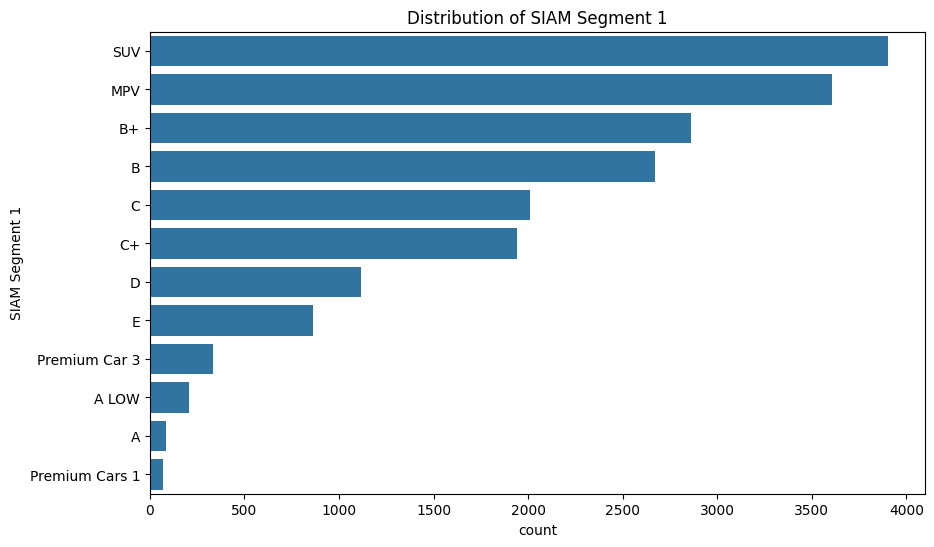

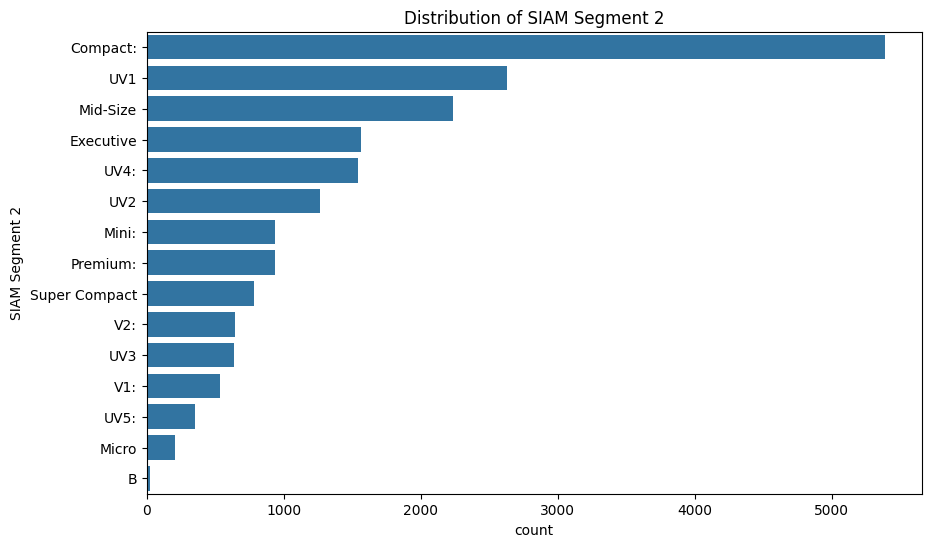

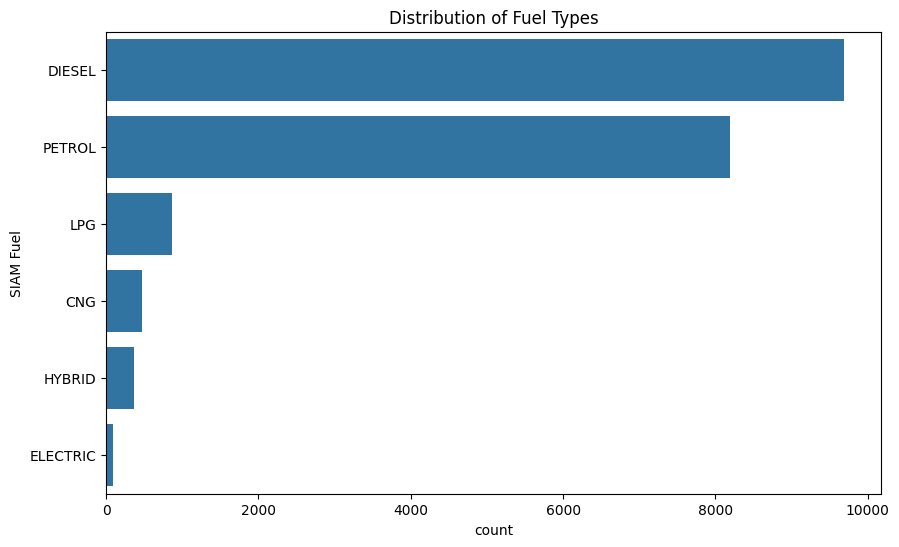

In [20]:
# Frequency analysis of categorical columns
print(df['SIAM Segment 1'].value_counts())
print(df['SIAM Segment 2'].value_counts())
print(df['SIAM Fuel'].value_counts())
print(df['Category'].value_counts())

# Plot the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='SIAM Segment 1', data=df, order=df['SIAM Segment 1'].value_counts().index)
plt.title('Distribution of SIAM Segment 1')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='SIAM Segment 2', data=df, order=df['SIAM Segment 2'].value_counts().index)
plt.title('Distribution of SIAM Segment 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='SIAM Fuel', data=df, order=df['SIAM Fuel'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.show()


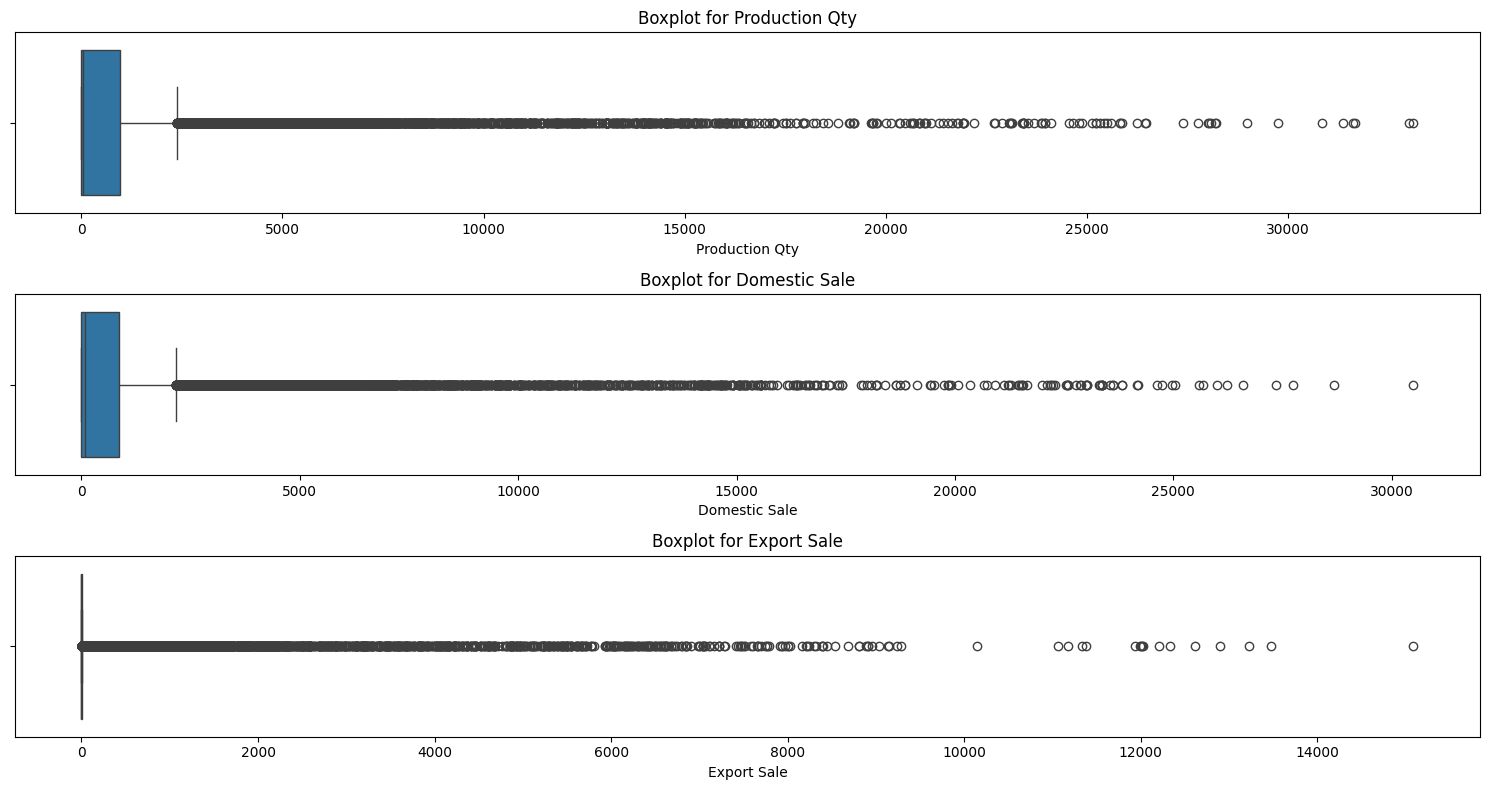

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numeric columns
plt.figure(figsize=(15, 8))

# Boxplot for Production Qty
plt.subplot(3, 1, 1)
sns.boxplot(x='Production Qty', data=df)
plt.title('Boxplot for Production Qty')

# Boxplot for Domestic Sale
plt.subplot(3, 1, 2)
sns.boxplot(x='Domestic Sale', data=df)
plt.title('Boxplot for Domestic Sale')

# Boxplot for Export Sale
plt.subplot(3, 1, 3)
sns.boxplot(x='Export Sale', data=df)
plt.title('Boxplot for Export Sale')

plt.tight_layout()
plt.show()


In [21]:
# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers_prod_qty = detect_outliers_iqr(df, 'Production Qty')
print(f"Outliers in Production Qty: {len(outliers_prod_qty)}")

outliers_dom_sale = detect_outliers_iqr(df, 'Domestic Sale')
print(f"Outliers in Domestic Sale: {len(outliers_dom_sale)}")

outliers_export_sale = detect_outliers_iqr(df, 'Export Sale')
print(f"Outliers in Export Sale: {len(outliers_export_sale)}")


Outliers in Production Qty: 3082
Outliers in Domestic Sale: 2830
Outliers in Export Sale: 4760


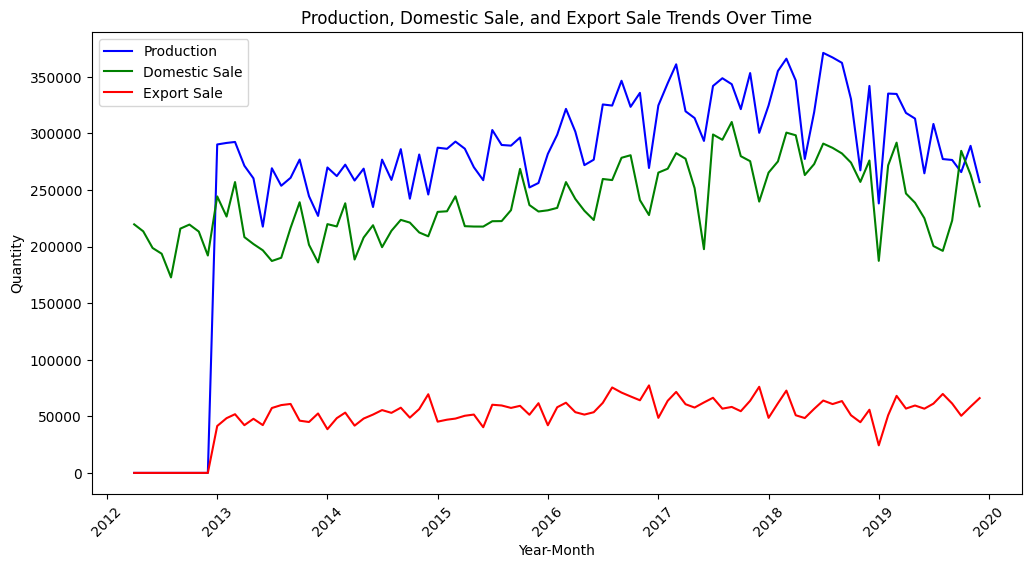

In [23]:
# Convert 'YrMth' to datetime format and group data by month
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')

# Group by month and summarize production and sales
df_monthly = df.groupby('YrMth').agg({'Production Qty': 'sum', 'Domestic Sale': 'sum', 'Export Sale': 'sum'}).reset_index()

# Plot production and sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['YrMth'], df_monthly['Production Qty'], label='Production', color='b')
plt.plot(df_monthly['YrMth'], df_monthly['Domestic Sale'], label='Domestic Sale', color='g')
plt.plot(df_monthly['YrMth'], df_monthly['Export Sale'], label='Export Sale', color='r')
plt.title('Production, Domestic Sale, and Export Sale Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Quantity')
plt.legend()
plt.xticks(rotation=45)
plt.show()


                Production Qty  Domestic Sale  Export Sale
Production Qty        1.000000       0.888802     0.506089
Domestic Sale         0.888802       1.000000     0.212927
Export Sale           0.506089       0.212927     1.000000


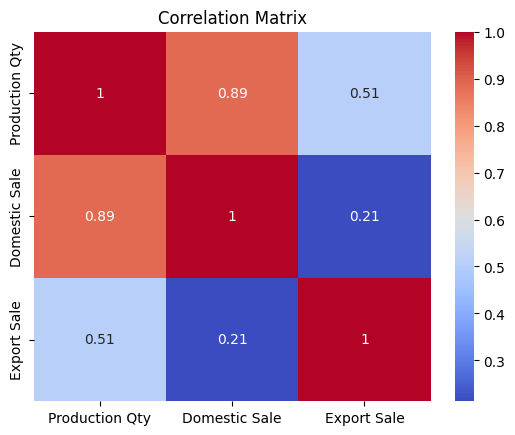

In [25]:
# Correlation matrix of numerical columns
correlation_matrix = df[['Production Qty', 'Domestic Sale', 'Export Sale']].corr()
print(correlation_matrix)

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


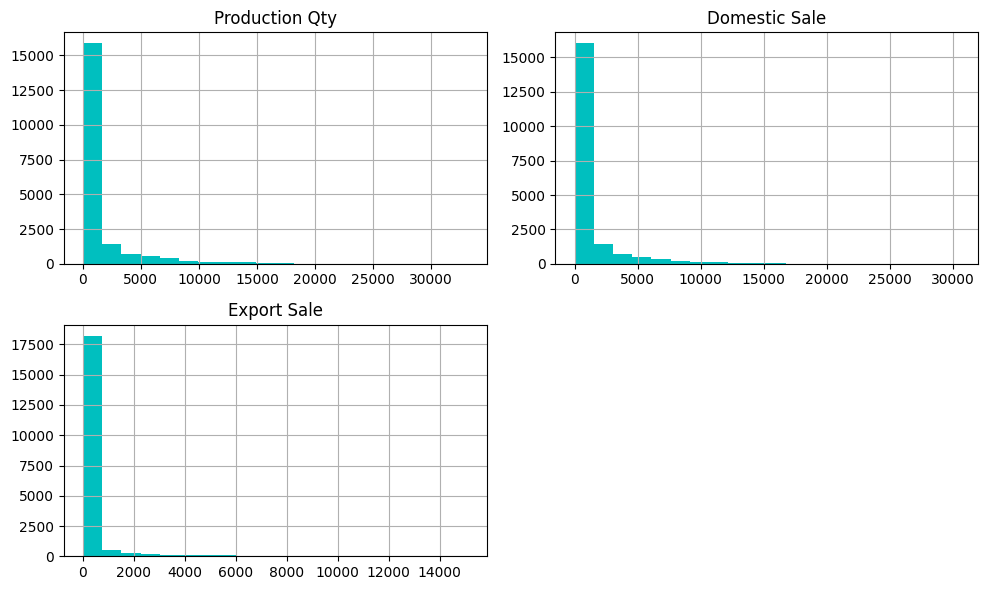

In [27]:
# Histogram for numeric columns
df[['Production Qty', 'Domestic Sale', 'Export Sale']].hist(bins=20, figsize=(10, 6), color='c')
plt.tight_layout()
plt.show()


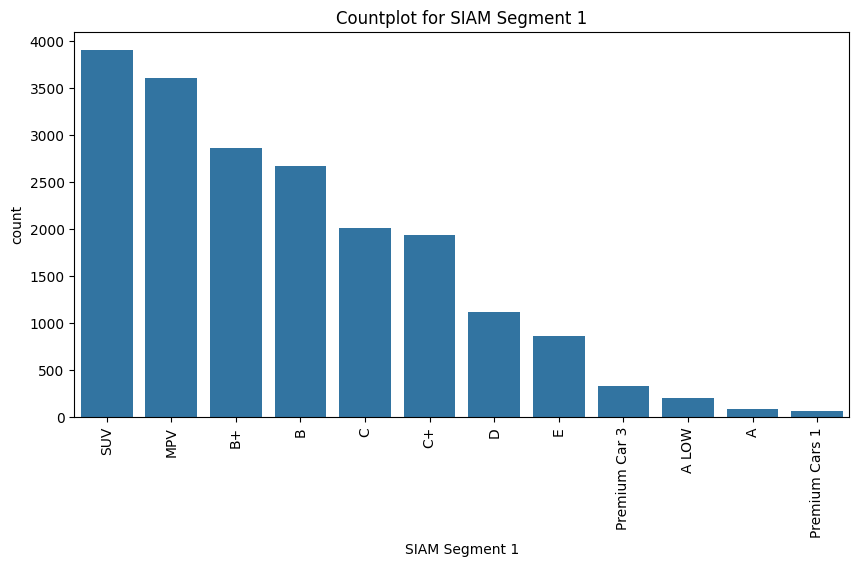

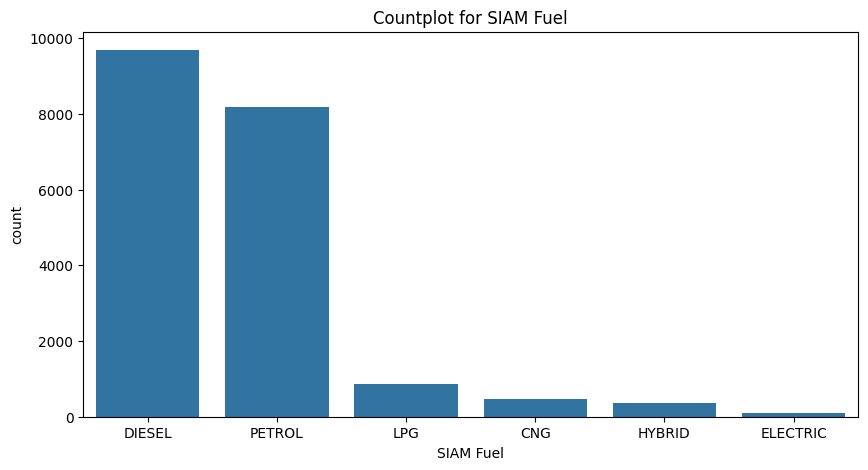

In [28]:
# Countplot for SIAM Segment 1
plt.figure(figsize=(10, 5))
sns.countplot(x='SIAM Segment 1', data=df, order=df['SIAM Segment 1'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Countplot for SIAM Segment 1')
plt.show()

# Countplot for SIAM Fuel
plt.figure(figsize=(10, 5))
sns.countplot(x='SIAM Fuel', data=df, order=df['SIAM Fuel'].value_counts().index)
plt.title('Countplot for SIAM Fuel')
plt.show()


           Production Qty  Domestic Sale  Export Sale
SIAM Fuel                                            
CNG             18.689362      11.427660     0.459574
DIESEL         911.874110     998.759571    26.571045
ELECTRIC        37.556818      36.590909     3.000000
HYBRID          18.340720      18.182825     0.000000
LPG             44.629070      55.622093     0.000000
PETROL        1944.468643    1514.376891   540.885920


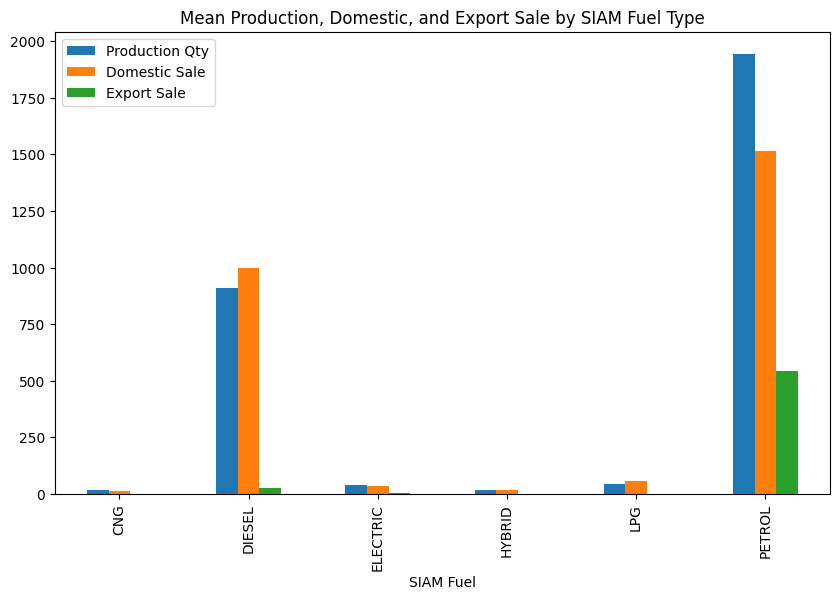

In [30]:
# Group by SIAM Fuel and calculate the mean of numeric columns
fuel_group = df.groupby('SIAM Fuel')[['Production Qty', 'Domestic Sale', 'Export Sale']].mean()
print(fuel_group)

# Visualize the grouped data
fuel_group.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Production, Domestic, and Export Sale by SIAM Fuel Type')
plt.show()


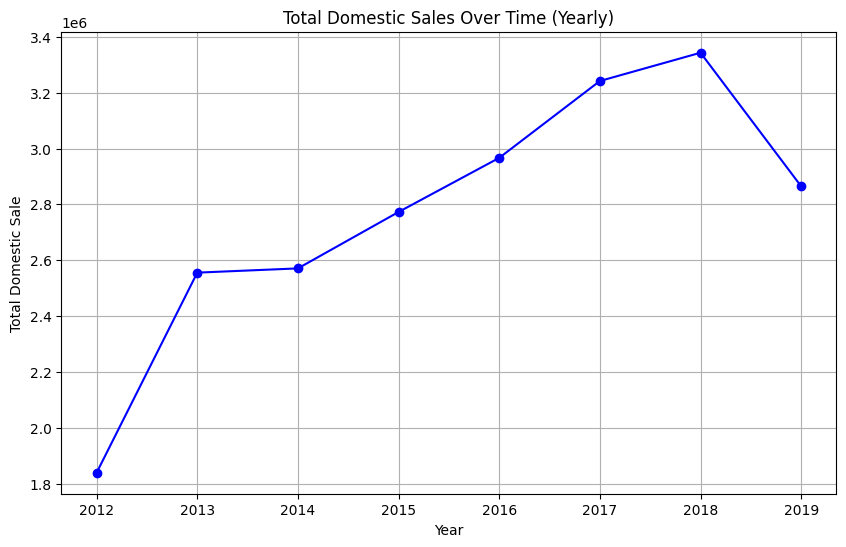

<Figure size 1200x600 with 0 Axes>

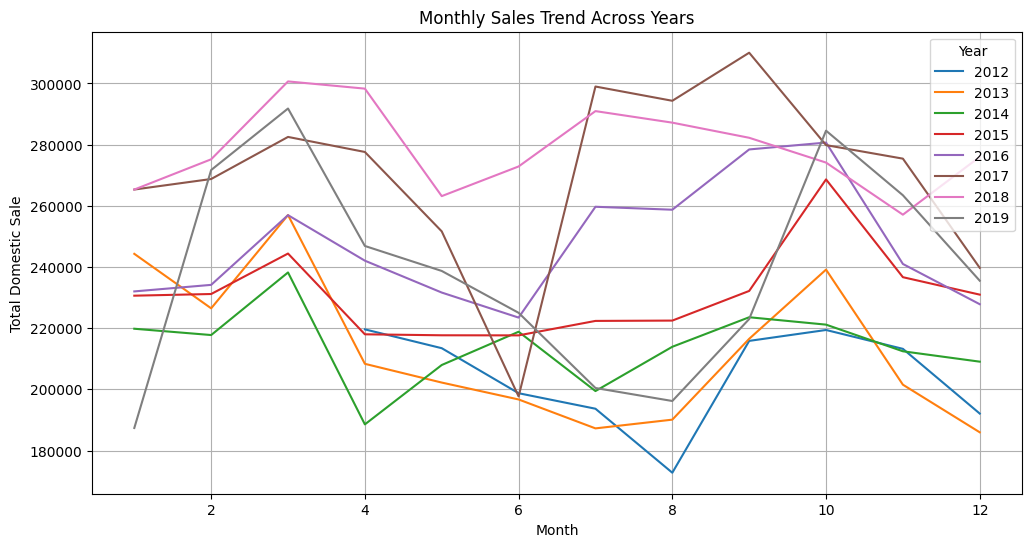

<Figure size 1200x600 with 0 Axes>

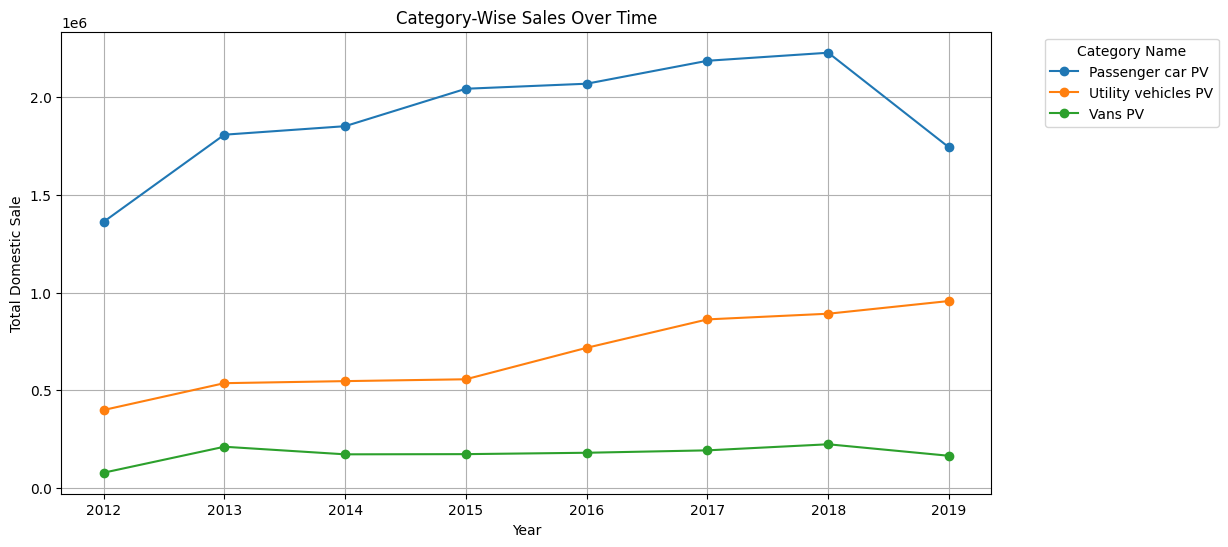

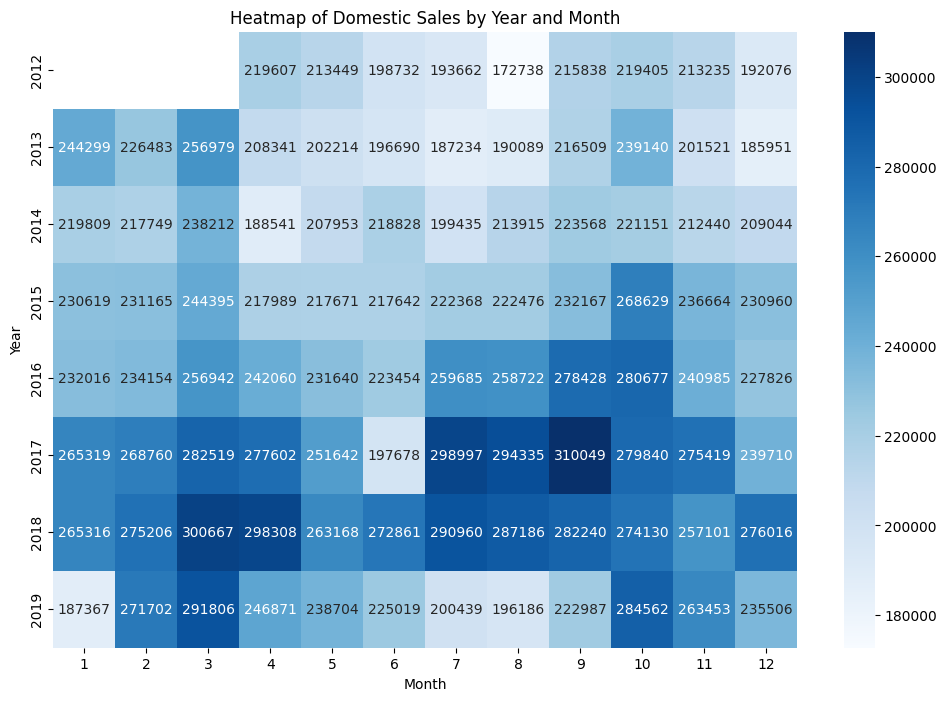

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'YrMth' is in datetime format and extract 'Year' and 'Month'
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')
df['Year'] = df['YrMth'].dt.year
df['Month'] = df['YrMth'].dt.month

# Group data by Year, Month, and Category Name
grouped_data = df.groupby(['Year', 'Month', 'Category Name']).agg({'Domestic Sale': 'sum'}).reset_index()

#Total Domestic Sales Over Time (Yearly Trend)
plt.figure(figsize=(10, 6))
yearly_sales = grouped_data.groupby('Year')['Domestic Sale'].sum()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='b', linestyle='-')
plt.title('Total Domestic Sales Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Domestic Sale')
plt.grid(True)
plt.show()

#Monthly Sales Pattern Across Years
plt.figure(figsize=(12, 6))
monthly_sales = grouped_data.groupby(['Year', 'Month'])['Domestic Sale'].sum().unstack(level=0)
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trend Across Years')
plt.xlabel('Month')
plt.ylabel('Total Domestic Sale')
plt.grid(True)
plt.show()

#Category-Wise Sales Over Time
plt.figure(figsize=(12, 6))
category_sales_over_time = grouped_data.groupby(['Year', 'Category Name'])['Domestic Sale'].sum().unstack()
category_sales_over_time.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Category-Wise Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Domestic Sale')
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#Heatmap of Sales by Month and Year
plt.figure(figsize=(12, 8))
pivot_table = grouped_data.pivot_table(values='Domestic Sale', index='Year', columns='Month', aggfunc='sum')
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')
plt.title('Heatmap of Domestic Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


### Key Insights:

- **Production Quantity and Domestic Sales are positively correlated**:  
  - As production increases, domestic sales tend to increase as well, indicating a strong relationship between the two.

- **Production exceeds both Domestic and Export Sales**:  
  - Production consistently remains higher than both domestic and export sales.  
  - This suggests a significant portion of the production is consumed domestically, with only a small fraction being exported.

- **Sales spike during October and November**:  
  - In the *Monthly Sales Trend Across Years* and the *Heatmap*, there's a clear spike in sales during **October** and **November** across multiple years (especially **2015**, **2017**, and **2018**).  
  - This likely aligns with **festive seasons** or **year-end promotions** driving higher sales volumes.

- **Passenger Cars dominate the domestic market**:  
  - From the *Category-Wise Sales Over Time* plot, **Passenger Cars (PV)** consistently show significantly higher sales compared to **Utility Vehicles (PV)** and **Vans (PV)**.  
  - **Passenger cars** remain the backbone of the market.

- **Decline in Passenger Car sales since 2017**:  
  - Despite their dominance, there has been a notable decline in **Passenger Car** sales since 2017.  
  - This may prompt manufacturers to diversify into **Utility Vehicles**, which are growing, or investigate the reasons behind the decline in the passenger car segment.


Forecasting for Passenger car PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\2027397613.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


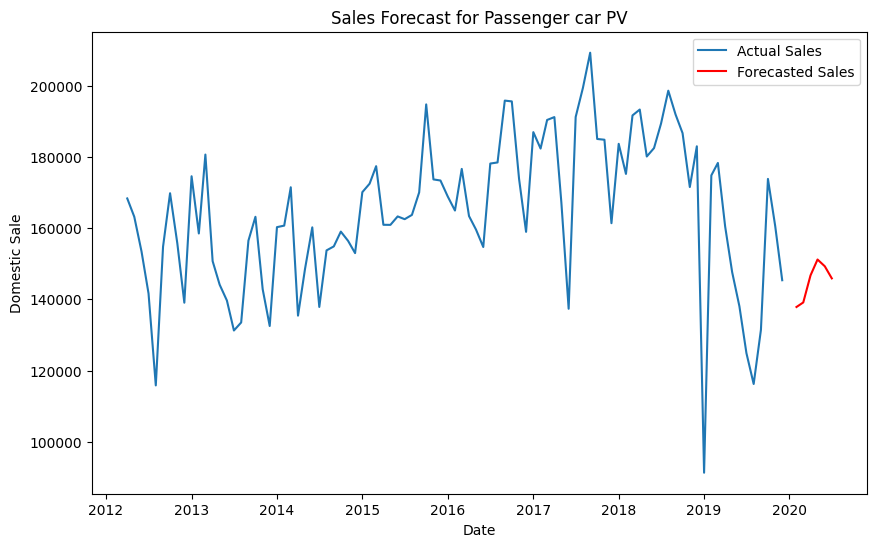

Forecasting for Utility vehicles PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\2027397613.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


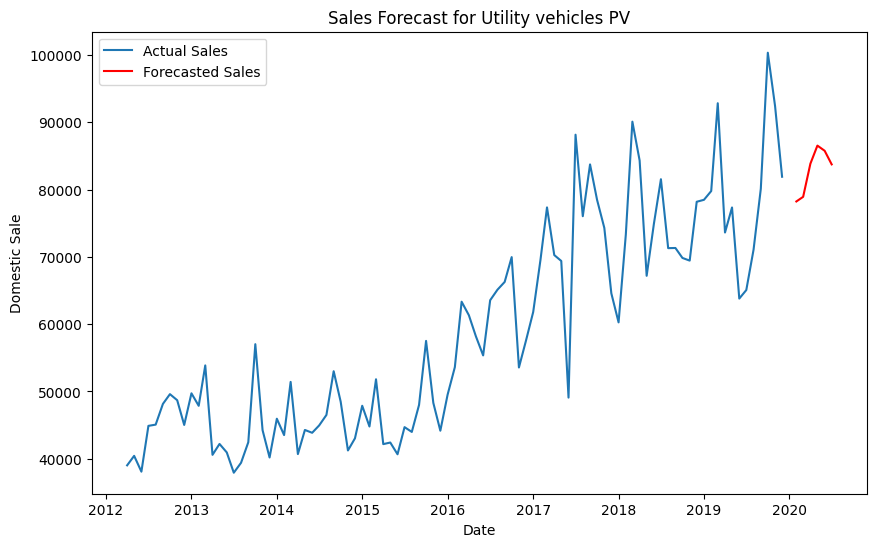

Forecasting for Vans PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\2027397613.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


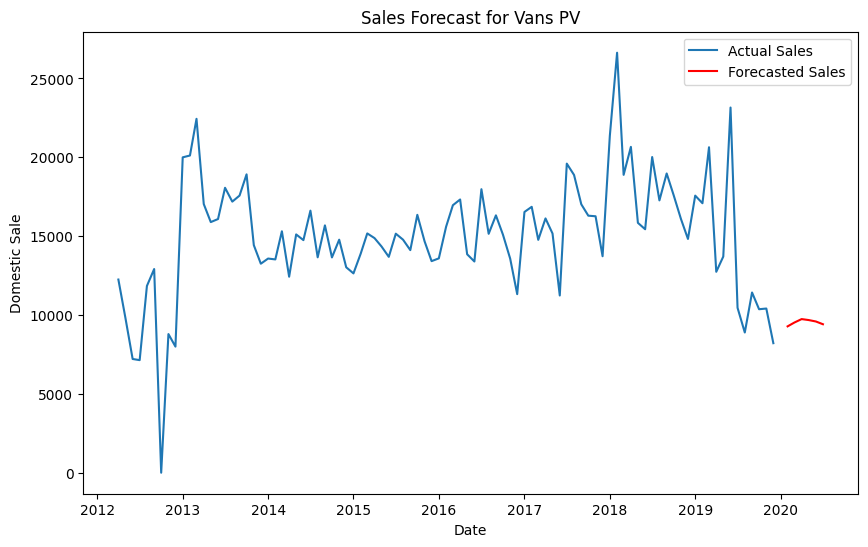

        YrMth  Forecasted Sales        Category Name
0  2020-01-31     137862.420017     Passenger car PV
1  2020-02-29     139137.016778     Passenger car PV
2  2020-03-31     146739.273982     Passenger car PV
3  2020-04-30     151195.943542     Passenger car PV
4  2020-05-31     149301.014374     Passenger car PV
5  2020-06-30     145898.203909     Passenger car PV
6  2020-01-31      78243.514161  Utility vehicles PV
7  2020-02-29      78930.446847  Utility vehicles PV
8  2020-03-31      83859.816264  Utility vehicles PV
9  2020-04-30      86548.803588  Utility vehicles PV
10 2020-05-31      85778.696856  Utility vehicles PV
11 2020-06-30      83756.698334  Utility vehicles PV
12 2020-01-31       9279.321277              Vans PV
13 2020-02-29       9522.326300              Vans PV
14 2020-03-31       9740.778223              Vans PV
15 2020-04-30       9679.392242              Vans PV
16 2020-05-31       9588.181046              Vans PV
17 2020-06-30       9414.298308              V

In [55]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'YrMth' is in datetime format and sort the data
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')
df.sort_values(by='YrMth', inplace=True)

#Group the data by 'YrMth' and 'Category Name' and sum the 'Domestic Sale'
category_sales = df.groupby(['YrMth', 'Category Name']).agg({'Domestic Sale': 'sum'}).reset_index()

# Initialize a DataFrame to store all forecast results
all_forecasts = pd.DataFrame()

# Loop through each unique category in 'Category Name'
for category in category_sales['Category Name'].unique():
    print(f"Forecasting for {category}...")
    
    #Filter for the current category
    df_category = category_sales[category_sales['Category Name'] == category]
    
    #Set 'YrMth' as the index for time series analysis
    df_category.set_index('YrMth', inplace=True)
    
    #Fit the ARIMA model
    model = ARIMA(df_category['Domestic Sale'], order=(5, 1, 0))
    model_fit = model.fit()
    
    #Forecast for the next 6 months
    forecast = model_fit.forecast(steps=6)
    
    #Generate future dates for plotting
    future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
    
    #Create a DataFrame for the forecasted results
    forecast_df = pd.DataFrame({'YrMth': future_dates, 'Forecasted Sales': forecast})
    forecast_df['Category Name'] = category
    
    #Append the forecast to the master forecast DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast_df], ignore_index=True)
    
    #Plot the historical data and forecast for each category
    plt.figure(figsize=(10, 6))
    plt.plot(df_category.index, df_category['Domestic Sale'], label='Actual Sales')
    plt.plot(forecast_df['YrMth'], forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
    plt.title(f'Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Domestic Sale')
    plt.legend()
    plt.show()

print(all_forecasts)


Forecasting for Passenger car PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3231451439.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


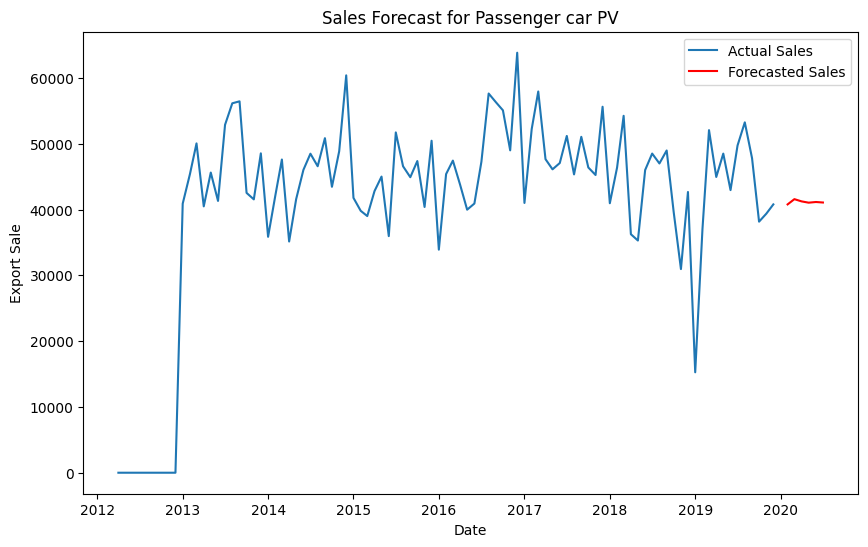

Forecasting for Utility vehicles PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3231451439.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


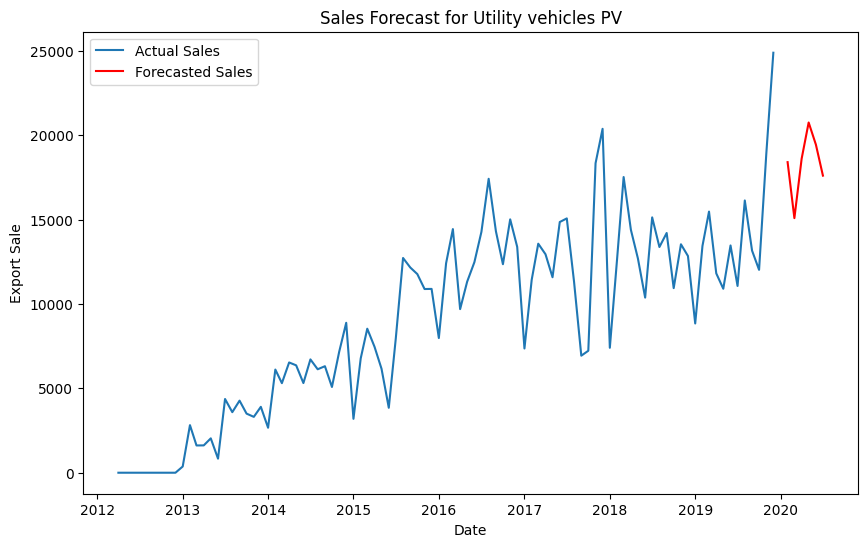

Forecasting for Vans PV...


c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Bhupesh P S\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Bhupesh P S\AppData\Local\Temp\ipykernel_6784\3231451439.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')


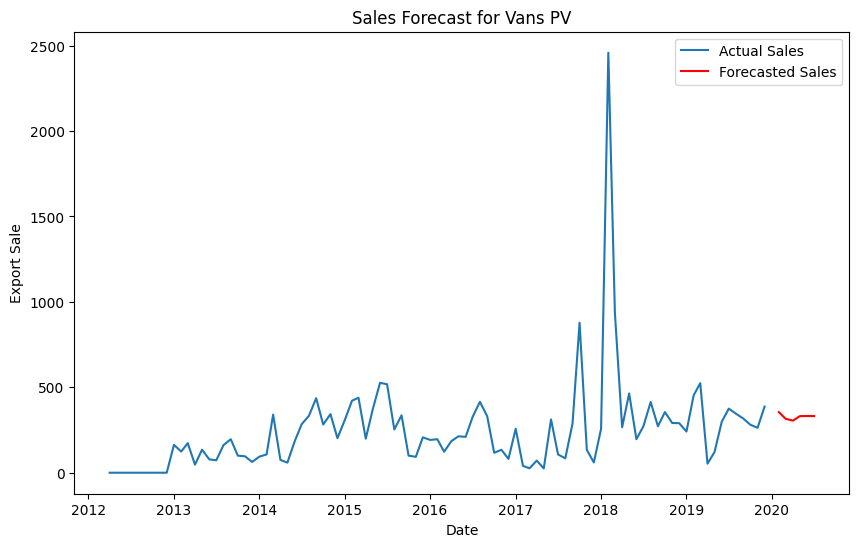

        YrMth  Forecasted Sales        Category Name
0  2020-01-31      40789.688044     Passenger car PV
1  2020-02-29      41586.617669     Passenger car PV
2  2020-03-31      41246.397337     Passenger car PV
3  2020-04-30      41052.087588     Passenger car PV
4  2020-05-31      41154.838081     Passenger car PV
5  2020-06-30      41077.222333     Passenger car PV
6  2020-01-31      18408.550628  Utility vehicles PV
7  2020-02-29      15090.132584  Utility vehicles PV
8  2020-03-31      18611.124810  Utility vehicles PV
9  2020-04-30      20757.955260  Utility vehicles PV
10 2020-05-31      19444.139224  Utility vehicles PV
11 2020-06-30      17608.878266  Utility vehicles PV
12 2020-01-31        354.619644              Vans PV
13 2020-02-29        315.466263              Vans PV
14 2020-03-31        304.813960              Vans PV
15 2020-04-30        331.238068              Vans PV
16 2020-05-31        331.842680              Vans PV
17 2020-06-30        331.353098              V

In [53]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'YrMth' is in datetime format and sort the data
df['YrMth'] = pd.to_datetime(df['YrMth'], format='%d-%m-%Y')
df.sort_values(by='YrMth', inplace=True)

#Group the data by 'YrMth' and 'Category Name' and sum the 'Export Sale'
category_exp_sales = df.groupby(['YrMth', 'Category Name']).agg({'Export Sale': 'sum'}).reset_index()

# Initialize a DataFrame to store all forecast results
all_forecasts = pd.DataFrame()

# Loop through each unique category in 'Category Name'
for category in category_exp_sales['Category Name'].unique():
    print(f"Forecasting for {category}...")
    
    #Filter for the current category
    df_category = category_exp_sales[category_exp_sales['Category Name'] == category]
    
    #Set 'YrMth' as the index for time series analysis
    df_category.set_index('YrMth', inplace=True)
    
    #Fit the ARIMA model 
    model = ARIMA(df_category['Export Sale'], order=(5, 1, 0))
    model_fit = model.fit()
    
    #Forecast for the next 6 months
    forecast = model_fit.forecast(steps=6)
    
    #Generate future dates for plotting
    future_dates = pd.date_range(df_category.index[-1] + pd.DateOffset(months=1), periods=6, freq='M')
    
    #Create a DataFrame for the forecasted results
    forecast_df = pd.DataFrame({'YrMth': future_dates, 'Forecasted Sales': forecast})
    forecast_df['Category Name'] = category
    
    #Append the forecast to the master forecast DataFrame
    all_forecasts = pd.concat([all_forecasts, forecast_df], ignore_index=True)
    
    #Plot the historical data and forecast for each category
    plt.figure(figsize=(10, 6))
    plt.plot(df_category.index, df_category['Export Sale'], label='Actual Sales')
    plt.plot(forecast_df['YrMth'], forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red')
    plt.title(f'Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Export Sale')
    plt.legend()
    plt.show()

#View the forecasted sales for all categories for the next 6 months
print(all_forecasts)
